In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [16]:
y_test.shape

(10000,)

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
def plot_sample(X , y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(y[index])

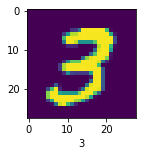

In [11]:
plot_sample(X_train, y_train, 7)

Normalize the images to a number from 0 to 1. Image has 3 channels (RGB) and each value in the channel can range from 0 to 255. Hence to normalize in 0 -->1 range, we need to divide it by 255.

In [13]:
# Normalizing the data

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
## Build a simple artificial network for image classification

In [20]:
ann = models.Sequential([
                         layers.Flatten(input_shape = (28, 28, 1)),
                         layers.Dense(3000, activation = 'relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation = 'sigmoid')

])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.8500 - accuracy: 0.8037
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9270
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2080 - accuracy: 0.9421
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1723 - accuracy: 0.9526
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1451 - accuracy: 0.9604
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1269 - accuracy: 0.9662
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9697
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0979 - accuracy: 0.9738
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - accuracy: 0.9763
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.080

In [36]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9697


[0.1004113107919693, 0.9696999788284302]

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_train = X_train.reshape(-1, 28,28, 1)
X_train.shape

(60000, 28, 28, 1)

In [39]:
X_test = X_test.reshape(-1, 28,28,1)
X_test.shape

(10000, 28, 28, 1)

Accuracy is 0.977. Let's test it on CNN

In [21]:
# Let's build a CNN model

In [45]:
cnn = models.Sequential([
                         layers.Conv2D(filters = 30, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(100, activation = 'relu'),
                         layers.Dense(10, activation = 'sigmoid')
])

In [46]:
cnn.compile(optimizer = 'adam',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [47]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3003 - accuracy: 0.9097
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0557 - accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0145 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - accuracy: 0.9975
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.005

In [48]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [49]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9863


[0.052011650055646896, 0.986299991607666]